# Written By: Rupesh Kumar Dey
# Project Title: Deep Learning Based GI Tract Disease Classification By Analysing WCE Imaging
# Notebook Title: Exploratory Data Analysis 

Python Notebook to Explore and study the characteristics of the raw data

In [41]:
# Import required libraries
import os
import pandas as pd
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import PIL
from PIL import Image
import cv2
import seaborn as sns

In [42]:
project_folder = "C:\\Users\\User\\Documents\\Masters in AI\\GITractClassification\\"

In [43]:
# Iterating through each folder in the project data directory
# Base path where data is stored. 
path_data = project_folder + "05_Dataset\\OriginalDatasetSplitted"
# Walk through data directory
for dirpath, dirnames, filenames in os.walk(path_data):
    if len(filenames) > 0:
      print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")    
# Summary:
# Analysis shows that the quanitty of images are balanced for each class
# Training image data quantity can be increased by means of data augmentation whcih will be explored further 

There are 0 directories and 300 images in 'C:\Users\User\Documents\Masters in AI\GITractClassification\05_Dataset\OriginalDatasetSplitted\test\0_normal'.
There are 0 directories and 300 images in 'C:\Users\User\Documents\Masters in AI\GITractClassification\05_Dataset\OriginalDatasetSplitted\test\1_ulcerative_colitis'.
There are 0 directories and 300 images in 'C:\Users\User\Documents\Masters in AI\GITractClassification\05_Dataset\OriginalDatasetSplitted\test\2_polyps'.
There are 0 directories and 300 images in 'C:\Users\User\Documents\Masters in AI\GITractClassification\05_Dataset\OriginalDatasetSplitted\test\3_esophagitis'.
There are 0 directories and 1050 images in 'C:\Users\User\Documents\Masters in AI\GITractClassification\05_Dataset\OriginalDatasetSplitted\train\0_normal'.
There are 0 directories and 1050 images in 'C:\Users\User\Documents\Masters in AI\GITractClassification\05_Dataset\OriginalDatasetSplitted\train\1_ulcerative_colitis'.
There are 0 directories and 1050 images in 

In [44]:
# Total number of training_validation_test images
TrainSize = 1050 * 4
ValSize = 150 * 4 
TestSize = 300 * 4
print(f"Training Dataset Size : {TrainSize}")
print(f"Validation Dataset Size : {ValSize}")
print(f"Test Dataset Size : {TestSize}")

Training Dataset Size : 4200
Validation Dataset Size : 600
Test Dataset Size : 1200


In [45]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
data_dir = pathlib.Path(project_folder + "05_Dataset\\OriginalDatasetSplitted\\train") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print("4 Major Classes are:")
print(class_names)

4 Major Classes are:
['0_normal' '1_ulcerative_colitis' '2_polyps' '3_esophagitis']


In [46]:
# Helper function to view an image
def view_random_image(target_dir, target_class):
    """
    Function that plots 3 random images from a directory
    input:
        a) target_dir - folder directory where images are stored
        b) target_class - the class that you want to display the image from
    """
    # Setup target directory (we'll view images from here)
    target_folder = target_dir+target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 3)
    print(random_image)
    plt.figure(figsize = (30,10))
    for i in range(len(random_image)):
        # Read in the image and plot it using matplotlib
        print(random_image[i])
        img = mpimg.imread(target_folder + "/" + random_image[i])
        plt.subplot(1,3,i+1)
        plt.imshow(img)
    plt.rcParams['savefig.facecolor']='red'
    plt.title(target_class)
    
    plt.axis("off");
    plt.show()

['train_normal_ (517).jpg', 'train_normal_ (644).jpg', 'train_normal_ (754).jpg']
train_normal_ (517).jpg
train_normal_ (644).jpg
train_normal_ (754).jpg


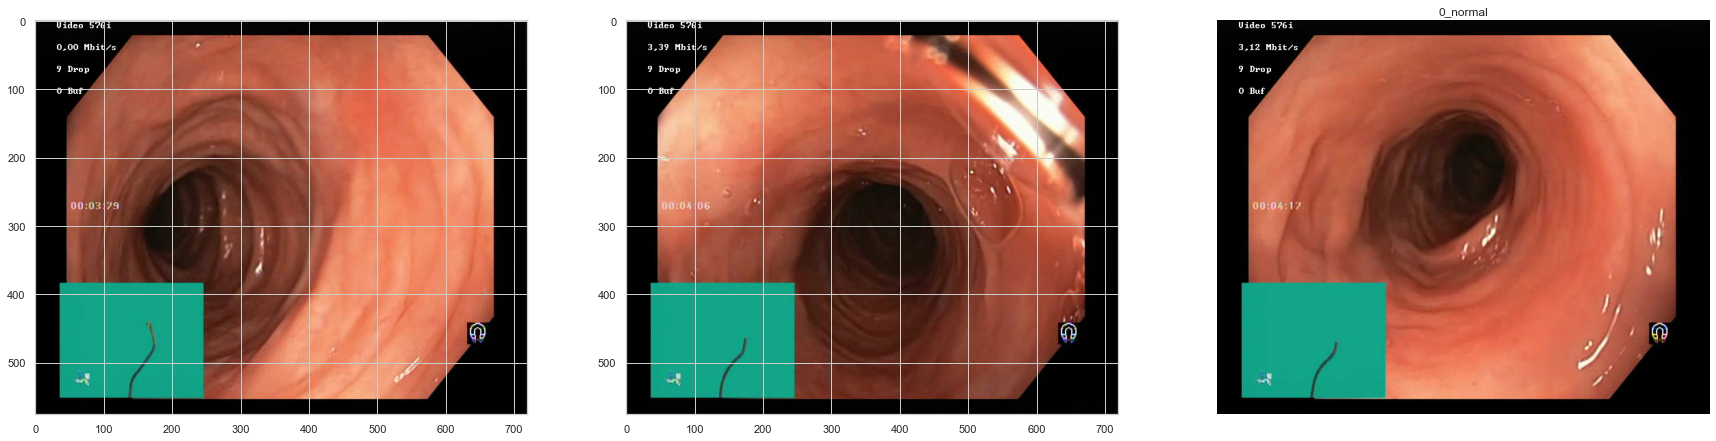

In [47]:
# Randomly vieweing and plotting images for normal class
view_random_image(project_folder + "\\05_Dataset\\OriginalDatasetSplitted\\train\\","0_normal")

['val_ulcer_ (257).jpg', 'train_ulcer_ (311).jpg', 'train_ulcer_ (344).jpg']
val_ulcer_ (257).jpg
train_ulcer_ (311).jpg
train_ulcer_ (344).jpg


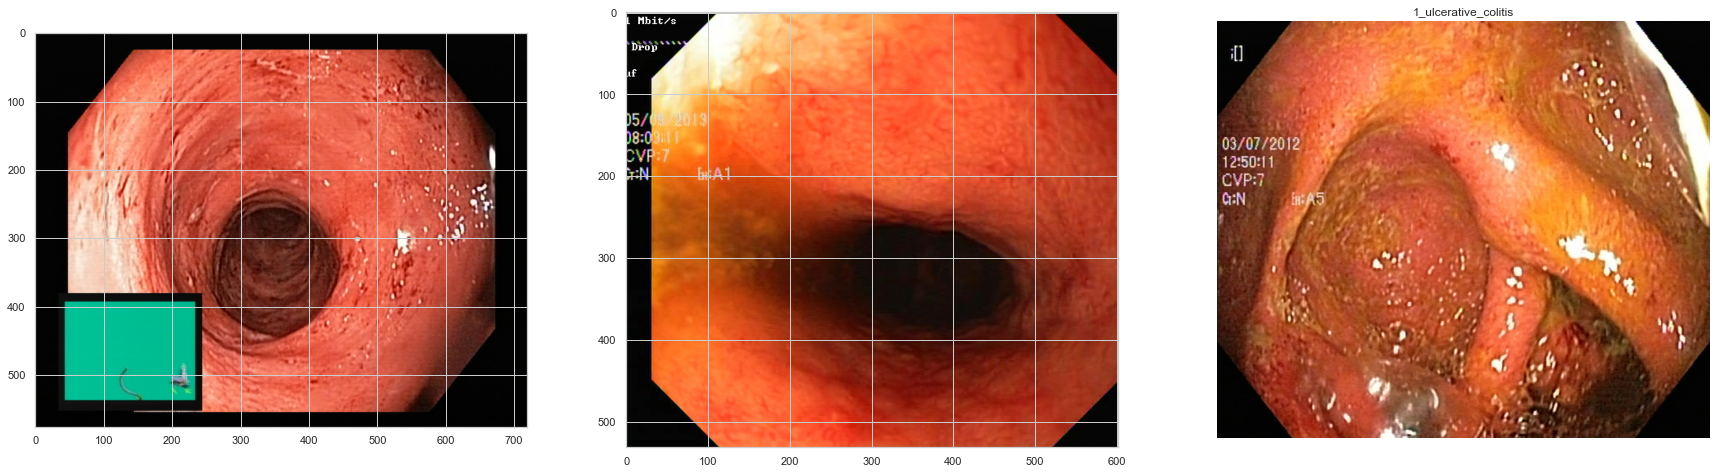

In [48]:
# Randomly viewing and plotting images for ulcerative colitis class
view_random_image(project_folder + "\\05_Dataset\\OriginalDatasetSplitted\\train\\","1_ulcerative_colitis")

['train_polyps_ (701).jpg', 'train_polyps_ (772).jpg', 'val_polyps_ (262).jpg']
train_polyps_ (701).jpg
train_polyps_ (772).jpg
val_polyps_ (262).jpg


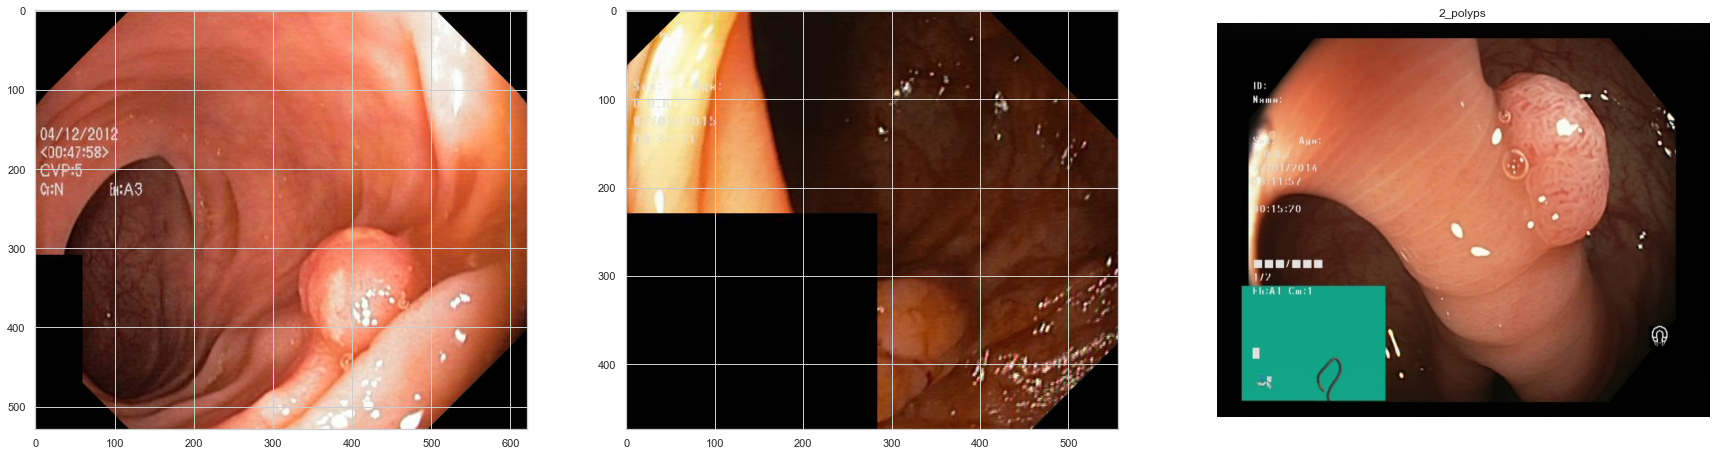

In [49]:
# Randomly viewing and plotting images for polyps class
view_random_image(project_folder + "\\05_Dataset\\OriginalDatasetSplitted\\train\\","2_polyps")

['train_esophagitis_ (102).jpg', 'train_esophagitis_ (253).jpg', 'val_esophagitis_ (382).jpg']
train_esophagitis_ (102).jpg
train_esophagitis_ (253).jpg
val_esophagitis_ (382).jpg


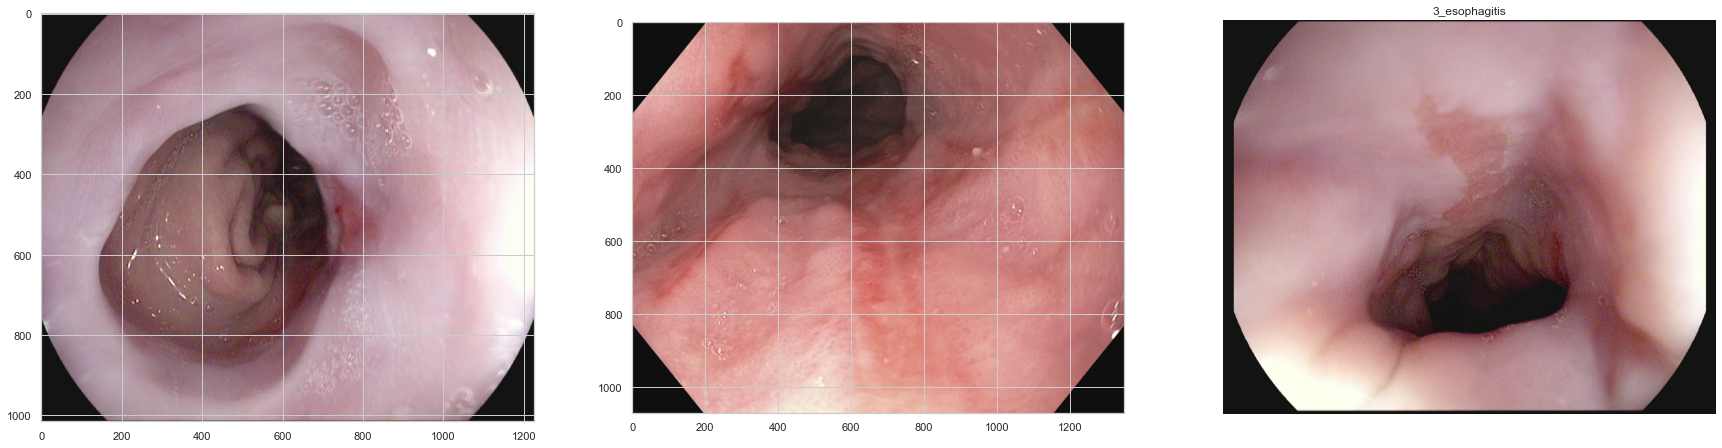

In [50]:
# Randomly vieweing and plotting images for esophagitis class
view_random_image(project_folder + "\\05_Dataset\\OriginalDatasetSplitted\\train\\","3_esophagitis")

In [51]:
# # Section to create dataframe of image parameters
# # Only limited to training image data
# # Uncomment to run

# Now we create a .csv file with the contents / metadata from the entire training dataset. 
trainPath = project_folder + "05_Dataset\\OriginalDatasetSplitted\\train\\"
trainDir = os.listdir(trainPath)
new_df = pd.DataFrame(columns = ['image_id', 'path','class','width','height','channels','average_R','average_G','average_B'])

# Creating the csv file
# Loop through main project directory where training image is stored, gets the image and its parameters and appends it to the df
print("Processing")
for i in range(len(trainDir)):
    listImages = os.listdir(trainPath + trainDir[i])
    for j in range(len(listImages)):
        # Get Image location
        imageLocation = trainPath + trainDir[i] + "\\" + listImages[j]
        # Read image and convert BGR to RGB channel
        tempImage = cv2.imread(imageLocation)
        tempImage = cv2.cvtColor(tempImage, cv2.COLOR_BGR2RGB)
        # Get image dimension
        tempHeight, tempWidth, tempChannels = np.shape(tempImage)
        # Get image pixels
        tempAverage_R = np.mean(tempImage[:,:,0])
        tempAverage_G = np.mean(tempImage[:,:,1])
        tempAverage_B = np.mean(tempImage[:,:,2])
        # Append to dataframe for analysis
        new_df = new_df.append({'image_id' : listImages[j], 'path' : trainDir[i] + "\\" + listImages[j], 
                                'class': trainDir[i],'width': tempWidth,'height': tempHeight,'channels': tempChannels,
                                'average_R': tempAverage_R,'average_G': tempAverage_G,'average_B':tempAverage_B},ignore_index = True)

print("Done Processing")
# # Save dataframe to project directory
# new_df.to_csv("trainDataAnalysis.csv", index = False)

Processing
Done Processing


In [52]:
# Uploading csv file for analysis
df = pd.read_csv("trainDataAnalysis.csv", index_col = False)
df.head()

image_id                              path     class  width  \
0    train_normal_ (1).jpg    0_normal\train_normal_ (1).jpg  0_normal  615.0   
1   train_normal_ (10).jpg   0_normal\train_normal_ (10).jpg  0_normal  633.0   
2  train_normal_ (100).jpg  0_normal\train_normal_ (100).jpg  0_normal  633.0   
3  train_normal_ (101).jpg  0_normal\train_normal_ (101).jpg  0_normal  633.0   
4  train_normal_ (102).jpg  0_normal\train_normal_ (102).jpg  0_normal  633.0   

   height  channels   average_R   average_G  average_B  
0   531.0       3.0  137.630346   87.531594  69.068691  
1   531.0       3.0  141.796705   96.659800  74.475838  
2   532.0       3.0  144.548750  106.395343  80.402570  
3   532.0       3.0  155.410680   99.276625  75.801441  
4   532.0       3.0  119.790816   79.526503  61.595505

In [53]:
# grouping the data based on their mean, median,  min and max height and width parameters
df_grouped = df.groupby('class').agg({'width': ['mean',"median",'min', 'max'], 'height': ['mean',"median",'min', 'max']})
df_grouped

width                             height          \
                             mean  median    min     max        mean  median   
class                                                                          
0_normal               686.335238   720.0  459.0   720.0  559.053333   576.0   
1_ulcerative_colitis   658.807619   627.0  482.0  1920.0  558.131429   532.0   
2_polyps               652.767619   622.0  332.0  1920.0  556.036190   531.0   
3_esophagitis         1256.282857  1225.0  613.0  1920.0  998.212381  1015.0   

                                     
                        min     max  
class                                
0_normal              530.0   576.0  
1_ulcerative_colitis  447.0  1080.0  
2_polyps              352.0  1072.0  
3_esophagitis         523.0  1072.0

In [54]:
# Function to plot the data for visualizing the image size parameters
def plotHorizontalBar(y_axis, x_axis,parameterY,parameterX):
    # Set figure Size and background colour
    fig, ax = plt.subplots(figsize =(10, 5))
    fig.patch.set_facecolor('xkcd:mint green')
    # Horizontal Bar Plot
    ax.barh(y_axis, x_axis)
    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)
    # Remove x, y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)
    # Add x, y gridlines
    ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.2)
    # Show top values
    ax.invert_yaxis()
    # Add annotation to bars
    for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.5,
                 str(round((i.get_width()), 2)),
                 fontsize = 10, fontweight ='bold',
                 color ='grey')
    # Add Plot Title
    ax.set_title(f'Image {parameterY} and their {parameterX}',
                 loc ='center', )
    # Show Plot
    plt.show()

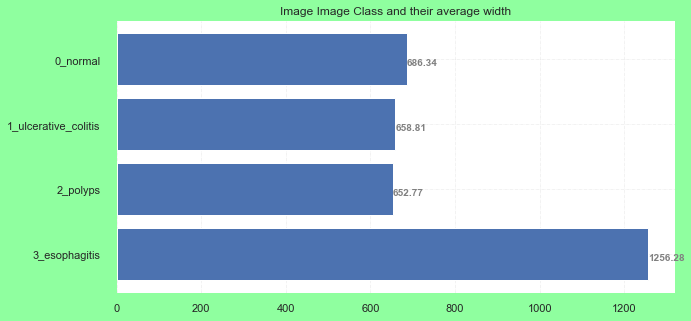

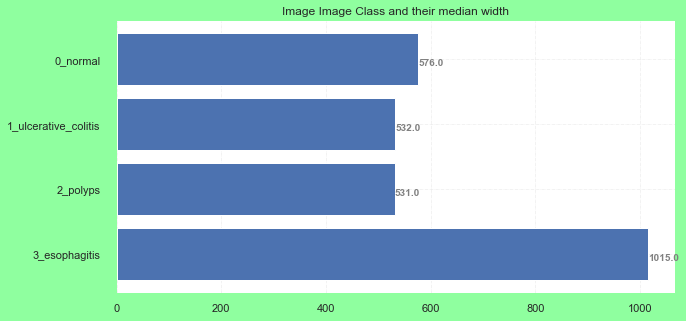

In [55]:
# # Read CSV into pandas 
classes = df_grouped.index
avgWidth = df_grouped['width']["mean"]
medWidth = df_grouped['width']["median"]
avgHeight = df_grouped['height']["mean"]
medWidth = df_grouped['height']["median"]

# Plotting width by class
plotHorizontalBar(classes,avgWidth,"Image Class","average width")
plotHorizontalBar(classes,medWidth,"Image Class","median width")
# Summary:
# Esogophitis class has the biggest image size averaging around 1.2K in average and 1K in median.(consider average)
# Other classes have image size of around 650 on average and 550 in median.

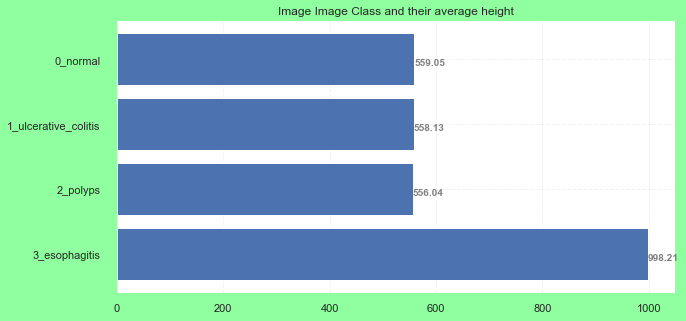

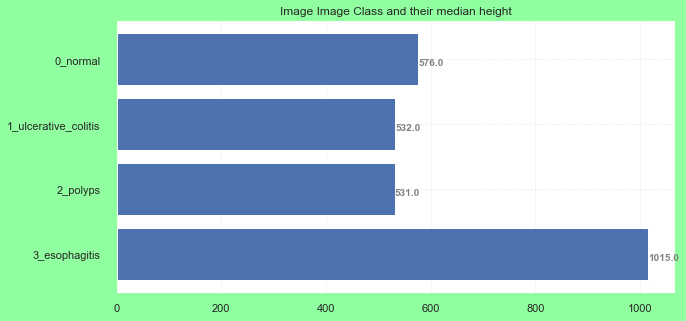

In [56]:
# Plotting height by class
plotHorizontalBar(classes,avgHeight,"Image Class","average height")
plotHorizontalBar(classes,medWidth,"Image Class","median height")
# Summary:
# average height of esogophiotis is around 1K (average) whereas the rest circle around 550
# Median wise the esogophitis is around 1K as well with the rest being around 550

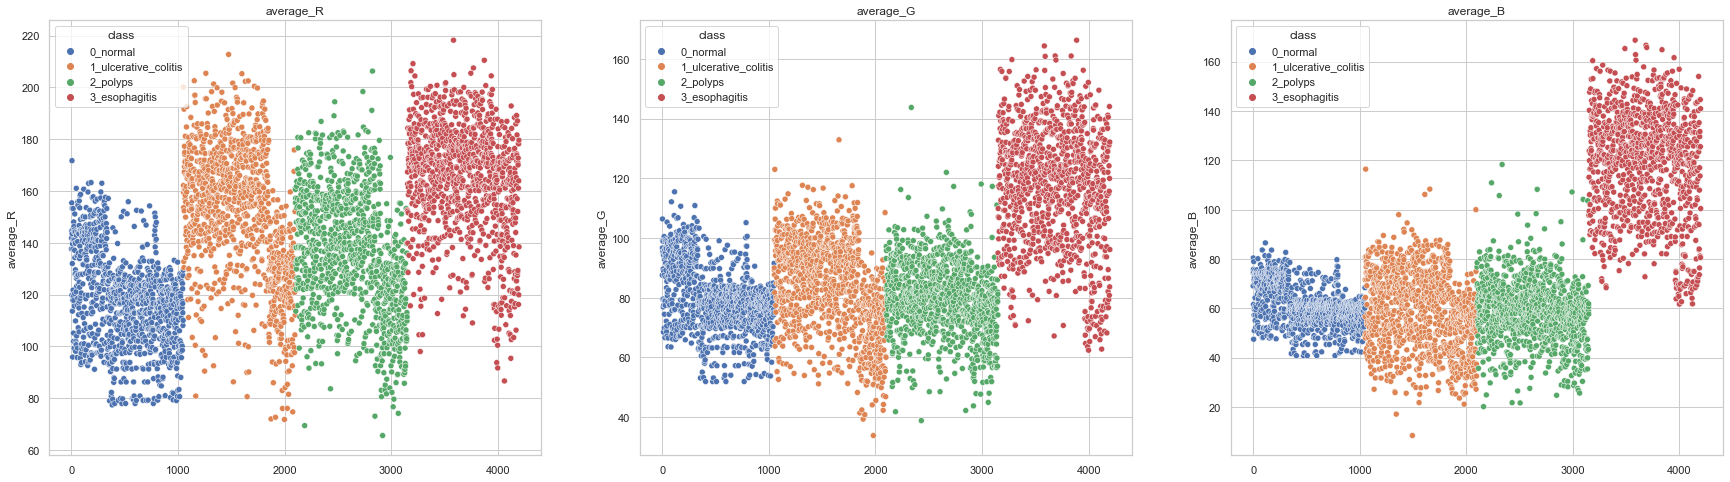

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [57]:
def scatterPlot(x,y,hue,dataset, figure, axes, position, title):
    """
    SNS scatterplot function to plot the average RGB values for training iamges for visualization
    """
    sns.set(style='whitegrid')
    plt.figure(figsize = (10,5))
    sns.scatterplot(x=x,
                        y=y,
                        hue=hue,
                        data=dataset, ax = axes[position]).set_title(title)
# Plotting for RGB scatter distribution for each colour channel
fig, axes = plt.subplots(figsize=(30,8), ncols=3, nrows=1)
scatterPlot(df.index,"average_R","class",df, fig, axes, 0,'average_R')
scatterPlot(df.index,"average_G","class",df,fig, axes, 1,'average_G')
scatterPlot(df.index,"average_B","class",df,fig, axes, 2,"average_B")

# On average, the color spectrum for all 3 is highest for the esogophitis class
# Looking at the green and blue spectrum, we see that the other classes have lower intensities as compare to esogophitis
# For Red color other classes exhibit higher values of pixels
# The normal class has the lowest concentration of pixels for all 3 RGB channels

Text(0.5, 1.0, 'Average B')

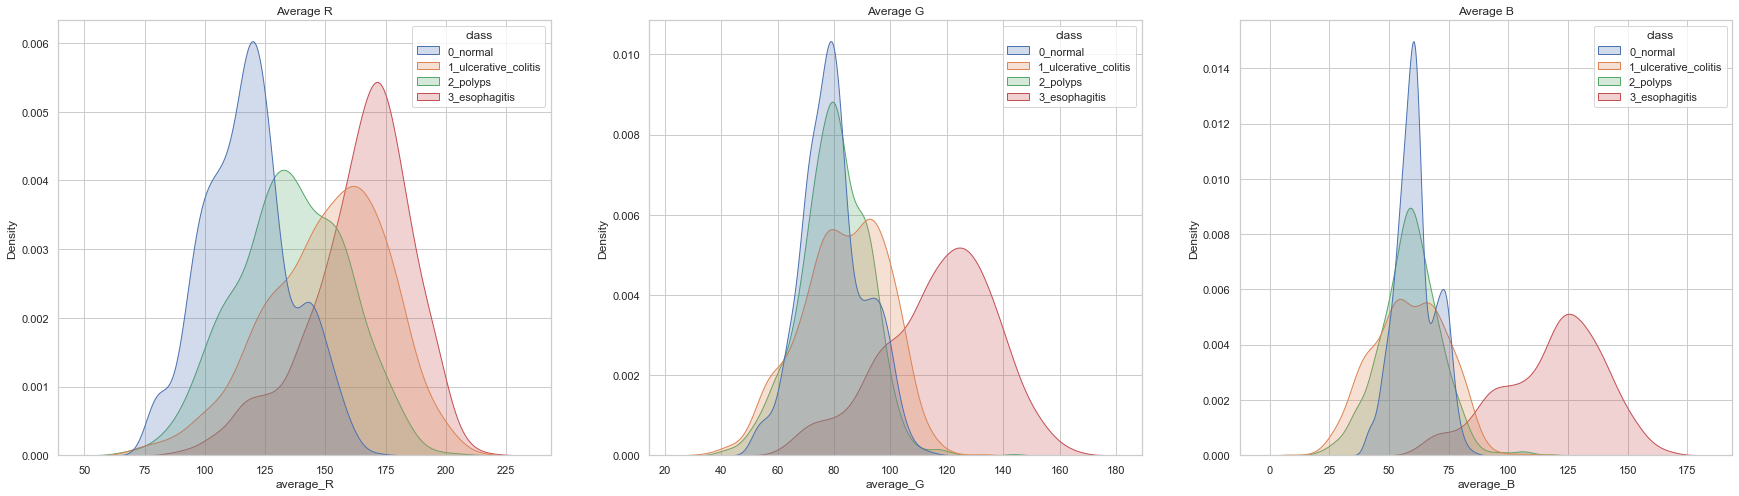

In [58]:
# plotting for RGB distribution by each class
fig, axes = plt.subplots(figsize=(30,8), ncols=3, nrows=1)
sns.kdeplot(data = df, x="average_R", hue="class", fill=True, ax = axes[0]).set_title("Average R")
sns.kdeplot(data = df, x="average_G", hue="class", fill=True, ax = axes[1]).set_title("Average G")
sns.kdeplot(data = df, x="average_B", hue="class", fill=True, ax = axes[2]).set_title("Average B")

# Pixel values are generally higher for esogophitis (this may make it more easily distinguihable) - The most distinct color that distinguishes is the G and B channels
# For normal class, the pixel values are much lower in value and are highly concentrated at that region
# To distinguish between ulverative and polyps, the RED channel may play the biggest role as the average values peak most distinguishabaly for this color channel followed by G and lastly B
# for B channel, it looks like it's very hard to distinguish between the G and B values. 

# The range of values. The R is the highest values from 0 - 255
# G is in the middle
# B is the lowest amongst all 3

Text(0.5, 1.0, '3_esophagitis')

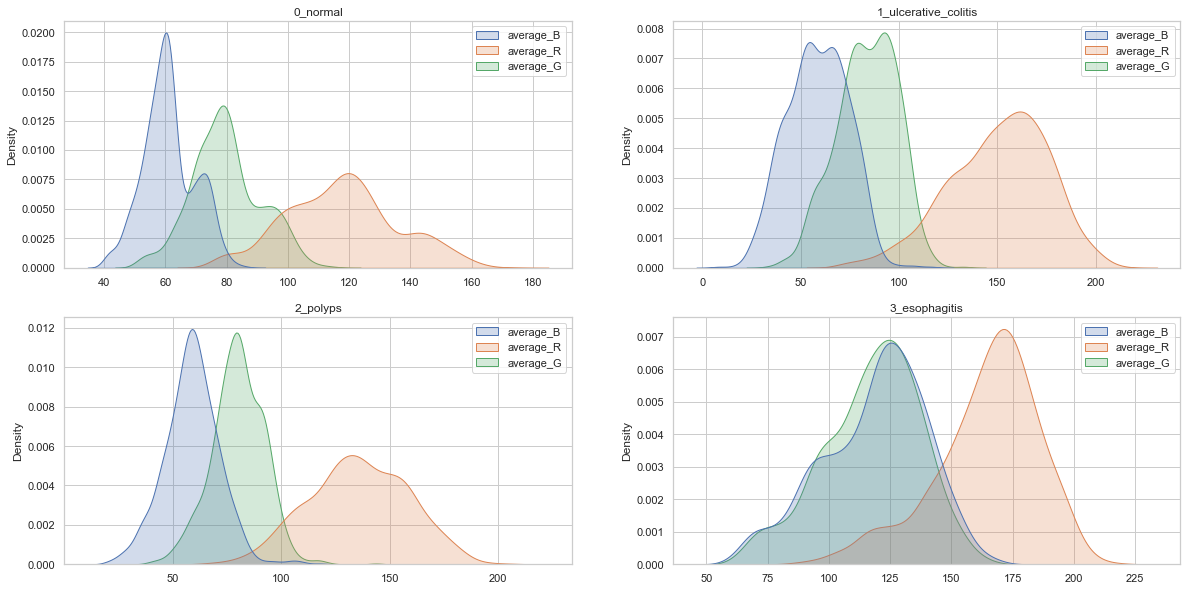

In [59]:
# Segregating distribution plots by each class for comparison
fig, axes = plt.subplots(figsize=(20,10), ncols=2, nrows=2)

# Normal Class
df_normal = df.loc[df["class"] == "0_normal"][["average_B","average_R","average_G"]]
sns.kdeplot(data=df_normal,fill=True,ax = axes[0,0]).set_title("0_normal")

# Ulcerative colitis
df_normal = df.loc[df["class"] == "1_ulcerative_colitis"][["average_B","average_R","average_G"]]
sns.kdeplot(data=df_normal,fill=True, ax = axes[0,1]).set_title("1_ulcerative_colitis")

# Polyps
df_normal = df.loc[df["class"] == "2_polyps"][["average_B","average_R","average_G"]]
sns.kdeplot(data=df_normal,fill=True, ax = axes[1,0]).set_title("2_polyps")

# Esogaphitis
df_normal = df.loc[df["class"] == "3_esophagitis"][["average_B","average_R","average_G"]]
sns.kdeplot(data=df_normal,fill=True, ax = axes[1,1]).set_title("3_esophagitis")

# Analyse each class on RGB values
# For all you see that the intensity of the RED  is the highest in images for all classes. 

# For normal, the peak of pixel values is at different distinct locations for RGB with the RED being the pixel with highest intensity and Red being the most spread out.  
# The intensity is also the lowest amongst all the other classes

# For ulcerative we observe that the B and G values are more spread out and overlapping but the red is distinctly peaking at a separate location. 
# Pattern remains the same where B and G peak quite sharplu and the red is more spread out
# Its range of values is also higher making it the 2nd highest for all 3 channels when comapred to other classes. 

# For polyps, we see that the B and G peak sharply at 2 different locations, and they are more concentrated at their particular regions. 
# Red on the other hand is more spread out but at a distinct different location
# The intensity of the pixel values are the 3rd highest as compared to the other classes. 

# Lastly for esogophitis. The pixel values for B and G is more spread out but also highly overlapping
# We see that the red channel dominates the entire image. 
# the pixel intensity values are also highest as comapred to the other 3. 
# The values are moderately spread out.

# Processing Validation Images

In [60]:
# Section to create dataframe of image parameters
# Only limited to validation image data

# Now we create a .csv file with the contents / metadata from the entire validation dataset. 
valPath = project_folder + "\\05_Dataset\\OriginalDatasetSplitted\\val\\"
valDir = os.listdir(valPath)
new_df = pd.DataFrame(columns = ['image_id', 'path','class','width','height','channels','average_R','average_G','average_B'])

# Creating the csv file
# Loop through main project directory where validation image is stored, gets the image and its parameters and appends it to the df
print("Processing")
for i in range(len(valDir)):
    listImages = os.listdir(valPath + valDir[i])
    for j in range(len(listImages)):
        imageLocation = valPath + valDir[i] + "\\" + listImages[j]
        
        tempImage = cv2.imread(imageLocation)
        tempImage = cv2.cvtColor(tempImage, cv2.COLOR_BGR2RGB)
        
        tempHeight, tempWidth, tempChannels = np.shape(tempImage)
        
        tempAverage_R = np.mean(tempImage[:,:,0])
        tempAverage_G = np.mean(tempImage[:,:,1])
        tempAverage_B = np.mean(tempImage[:,:,2])
        
        new_df = new_df.append({'image_id' : listImages[j], 'path' : valDir[i] + "\\" + listImages[j], 
                                'class': valDir[i],'width': tempWidth,'height': tempHeight,'channels': tempChannels,
                                'average_R': tempAverage_R,'average_G': tempAverage_G,'average_B':tempAverage_B},ignore_index = True)
print("Processing Done")
# Save dataframe to project directory
# new_df.to_csv("valDataAnalysis.csv", index = False)

Processing
Processing Done


# Processing Test Images

In [61]:
# Section to create dataframe of image parameters
# Only limited to test image data

# Now we create a .csv file with the contents / metadata from the entire test dataset. 
testPath = project_folder + "\\05_Dataset\\OriginalDatasetSplitted\\test\\"
testDir = os.listdir(testPath)
new_df = pd.DataFrame(columns = ['image_id', 'path','class','width','height','channels','average_R','average_G','average_B'])

# Creating the csv file
# Loop through main project directory where test image is stored, gets the image and its parameters and appends it to the df
print("Processing")
for i in range(len(testDir)):
    listImages = os.listdir(testPath + testDir[i])
    for j in range(len(listImages)):
        imageLocation = testPath + testDir[i] + "\\" + listImages[j]
        
        tempImage = cv2.imread(imageLocation)
        tempImage = cv2.cvtColor(tempImage, cv2.COLOR_BGR2RGB)
        
        tempHeight, tempWidth, tempChannels = np.shape(tempImage)
        
        tempAverage_R = np.mean(tempImage[:,:,0])
        tempAverage_G = np.mean(tempImage[:,:,1])
        tempAverage_B = np.mean(tempImage[:,:,2])
        
        new_df = new_df.append({'image_id' : listImages[j], 'path' : testDir[i] + "\\" + listImages[j], 
                                'class': testDir[i],'width': tempWidth,'height': tempHeight,'channels': tempChannels,
                                'average_R': tempAverage_R,'average_G': tempAverage_G,'average_B':tempAverage_B},ignore_index = True)

print("Processing Done")
        
# Save dataframe to project directory
# new_df.to_csv("testDataAnalysis.csv", index = False)

Processing
Processing Done
